### Abstract
- Find the Optimal Model of Diabetes dataset, using NaiveBayesClassifier, SupportVectorMachine, DecisionTreeClassifier, LogisticRegression,RandomForestClassifier.
- Find the meaning of Feature Selection, using RFE from Tree models & Correlation.
- Analysis of the results, considering of performance and understanding of the domain.

In [3]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler     
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
hdf= pd.read_csv('diabetes_data.csv')

In [5]:
hdf.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
hdf.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


### > Features
1.   **Age** : 13-level age category  
        1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 /  
        6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 /  
        11 = 70-74 / 12 = 75-79 /  13 = 80 or older
2.   **Sex** : patient's gender  
0 = female  
1 = male
3.   **HighChol** :  
0 = no high cholesterol  
1 = high cholesterol
4.   **CholCheck** :  
0 = no cholesterol check in 5 years  
1 = yes cholesterol check in 5 years
5.   **BMI** :  
Body Mass Index
6.   **Smoker** : Have you smoked at least 100 cigarettes in your entire life?  
[Note: 5 packs = 100 cigarettes]  
0 = no  
1 = yes
7.   **HeartDiseaseorAttack** : coronary heart disease (CHD) or myocardial infarction (MI)   
0 = no  
1 = yes
8.   **PhysActivity** : physical activity in past 30 days - not including job  
0 = no  
1 = yes
9.   **Fruits** : Consume Fruit 1 or more times per day   
0 = no  
1 = yes
10.  **Veggies** : Consume Vegetables 1 or more times per day  
0 = no  
1 = yes
11.  **HvyAlcoholConsump** : adult men >=14 drinks per week; adult women>=7 drinks per week  
0 = no  
1 = yes
12.  **GenHlth** : Would you say that in general your health is: scale 1-5  
1 = excellent  
2 = very good  
3 = good  
4 = fair  
5 = poor
13.  **MentHlth** : days of poor mental health scale 1-30 days  
1 = excellent  
...  
30 = poor
14.  **PhysHlth** : physical illness or injury days in past 30 days scale 1-30  
1 = excellent  
...  
30 = poor
15.  **DiffWalk** : Do you have serious difficulty walking or climbing stairs?  
0 = no  
1 = yes
16.  **Stroke** : you ever had a stroke.  
0 = no  
1 = yes
17.  **HighBP** : BP : Blood Pressure  
0 = no high BP  
1 = high BP

- *Class* **Diabetes**  :  
    0 = no diabetes  
    1 = diabetes

In [7]:
Age_stroke =hdf[(hdf.Stroke==1)].Age.value_counts()

In [8]:
hdf[(hdf.Stroke==1) & (hdf.Age>10)].Age.value_counts()

11.0    691
13.0    634
12.0    552
Name: Age, dtype: int64

In [9]:
age_d = pd.DataFrame(Age_stroke,columns=['Age','Count'],index=None)
age_d.reset_index(inplace=True)
age_d.rename(columns={'index': 'Age', 'Age':'Counts'},inplace=True)
age_d.drop(columns='Count',inplace=True)

In [10]:
age_df=age_d.sort_values(by = 'Age')

In [11]:
a=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']
age_df['des']=a

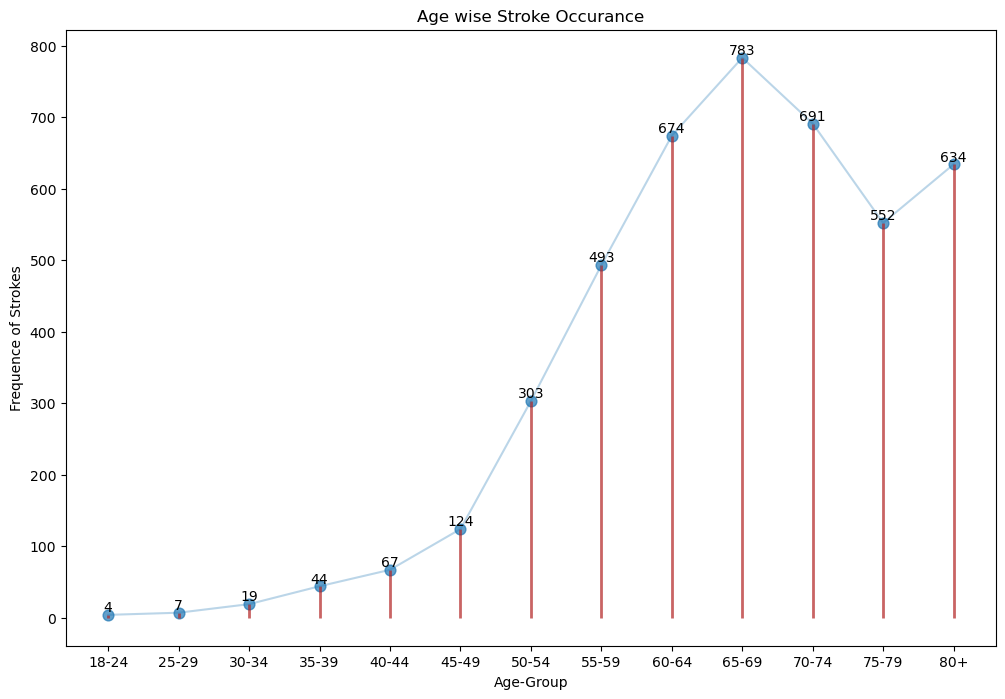

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

#Plotting
ax.vlines(x=age_df['des'], ymin=0, ymax=age_df['Counts'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=age_df['des'], y=age_df['Counts'], s=60, alpha=0.7)
ax.plot(age_df['des'], age_df['Counts'], alpha=0.3)

#Labels
ax.set_title('Age wise Stroke Occurance')
ax.set_xlabel('Age-Group')
ax.set_ylabel('Frequence of Strokes')

#Text Insertion
for row in age_df.itertuples():
    ax.text(row.des, row.Counts+.5, s=round(row.Counts, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=10)

plt.show()

##### we can observe that :-
- most of the Stroke happens between 50-80+ age Groups
- Maximum stroke victim are in the age of 65-69
- Very less stroke occured for the age below 40-44

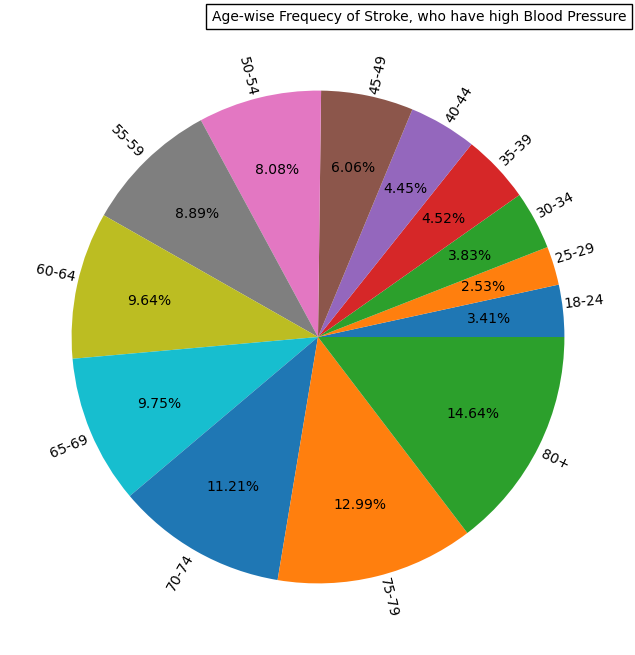

In [13]:
plt.figure(figsize=(16,8))

plt.pie((hdf[(hdf.HighBP==1) & (hdf.Stroke==1)].Age.value_counts()/hdf[(hdf.HighBP==1)].Age.value_counts())*100
        ,autopct='%.2f%%',labels=age_df['des'],rotatelabels = 270,pctdistance=0.7,labeldistance=1)

plt.title('Age-wise Frequecy of Stroke, who have high Blood Pressure',bbox=dict(facecolor='w', edgecolor='k'),loc='right',fontsize=10)

plt.show()

### Observations:
- In this graph we are seeing what is the stroke occurance percentage for High blood Pressure peoples
- We can see the people from Age Group 60 - 80+ are more likely to have a stroke if they have High blood pressure 
- Other Age group aren't affected by the same.

In [14]:
male=hdf[(hdf.Sex==1)& (hdf.Stroke==1)].Age.value_counts()/hdf[(hdf.Stroke==1)].Age.value_counts()*100

In [15]:
female=hdf[(hdf.Sex==0)& (hdf.Stroke==1)].Age.value_counts()/hdf[(hdf.Stroke==1)].Age.value_counts()*100

In [16]:
hdf[(hdf.Sex==0)& (hdf.Stroke==1)].Age.value_counts()/hdf[(hdf.Stroke==1)].Age.value_counts()*100

1.0     50.000000
2.0     71.428571
3.0     57.894737
4.0     54.545455
5.0     71.641791
6.0     57.258065
7.0     57.095710
8.0     57.403651
9.0     50.741840
10.0    49.680715
11.0    51.664255
12.0    53.804348
13.0    55.520505
Name: Age, dtype: float64

In [17]:
male_str=pd.DataFrame(male,index=None)

In [18]:
male_str['des']=a

In [19]:
male_str.rename(columns={'Age':'Stroke%'},inplace=True)

In [20]:
male_str['Fe']=female

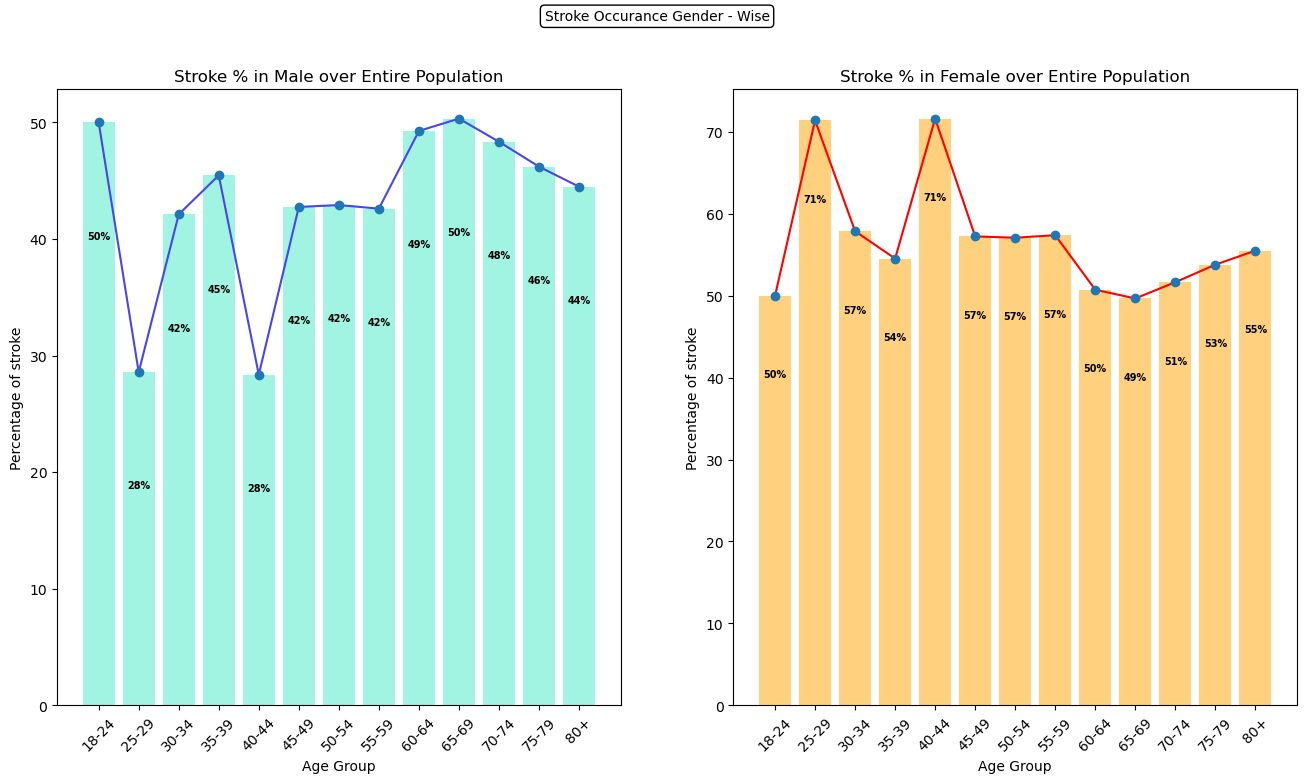

In [21]:
#Getting Subplots
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))

#Plotting 1st Barplot and Lineplot
ax1.plot(male_str['des'],male_str['Stroke%'],color='#4845EA',zorder=2)
ax1.scatter(male_str['des'],male_str['Stroke%'],zorder=3)
bars=ax1.bar(male_str['des'],male_str['Stroke%'],label='Male',alpha=0.5,color='#45EAC7',zorder=1)

#Plotting 2nd Barplot and Lineplot
ax2.plot(male_str['des'],male_str['Fe'],color='red',zorder=2)
ax2.scatter(male_str['des'],male_str['Fe'],zorder=3)
plt2=ax2.bar(male_str['des'],male_str['Fe'],label='Female',color='orange',zorder=1,alpha=0.5)

#1st Subplot Parameters
ax1.tick_params(axis='x',labelrotation=45)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Percentage of stroke')
ax1.set_title('Stroke % in Male over Entire Population')

#2nd Subplot Parameters
ax2.tick_params(axis='x',labelrotation=45)
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Percentage of stroke')
ax2.set_title('Stroke % in Female over Entire Population')

#text Insertion
for bar in plt2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 10, str(int(height)) + '%',
                   ha='center', color='k', fontsize=7,fontweight='bold')
#text Insertion
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 10, str(int(height)) + '%',
                   ha='center', color='k', fontsize=7,fontweight='bold')    

#Overall Title
plt.gcf().suptitle("Stroke Occurance Gender - Wise", fontsize=10,bbox=dict(facecolor='w',
                                                                           edgecolor='k', boxstyle='round'))

plt.show()

### Observations:- 
- Females have 25% more Stroke tendency than Males

- Male Graph
 1. Most Stroke Dominated Age : 18-24 , 30-34, 60-79
 2. Safe from most Stroke Age : 25-29 & 40-44

-----------------------------------------------------------------------------------
 
- Female Graph
 1. Most Stroke Dominated Age : 25-29 ,40-44
 2. Safe from most Stroke Age : All other Age group are less affected with respect to 
    other females age group but it is much more higher than males

In [22]:
hc=hdf[(hdf.HighChol==1) & (hdf.CholCheck==1)].Age.value_counts()/hdf[(hdf.CholCheck==1)].Age.value_counts()*100

In [23]:
Chol=pd.DataFrame(hc,index=None)

In [24]:
Chol['Des']=a

In [25]:
Chol.rename(columns={'Age':'Percentage'},inplace=True)

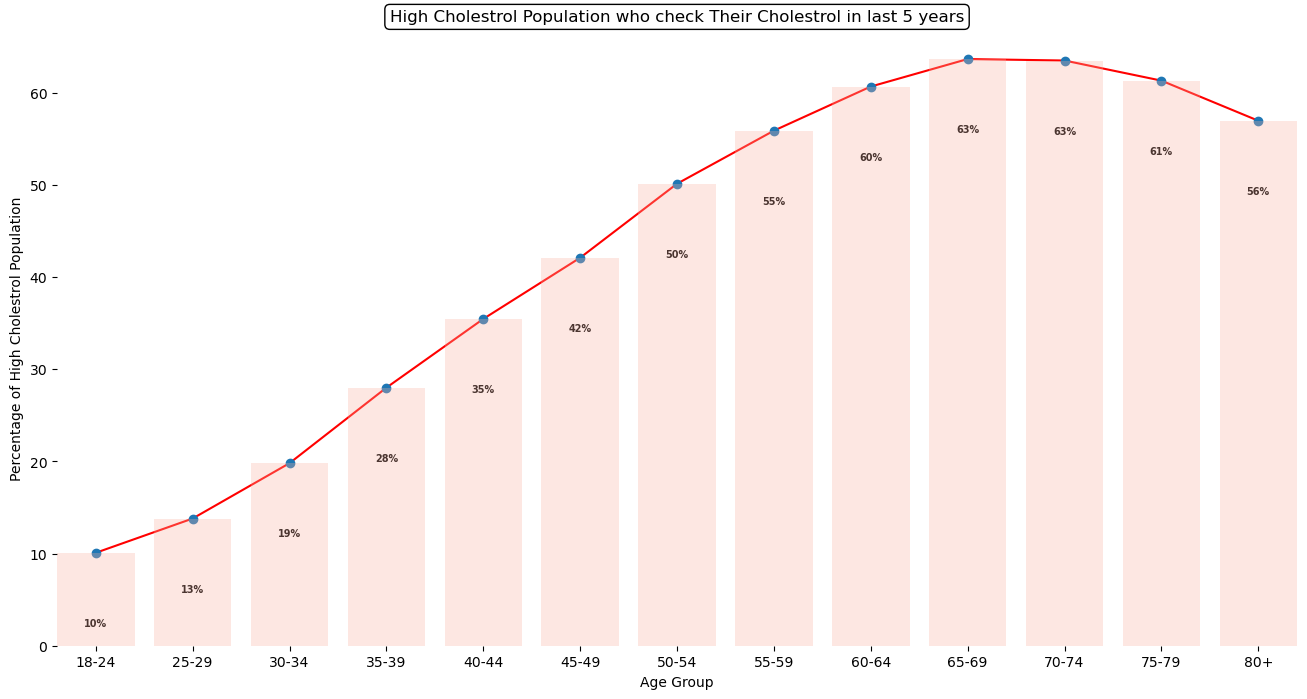

In [26]:
plt.figure(figsize=(16,8))
plt.margins(x=0)

plt.plot(Chol['Des'],Chol['Percentage'],zorder=2,color='r')
plt.scatter(Chol['Des'],Chol['Percentage'],zorder=3)
b=plt.bar(Chol['Des'],Chol['Percentage'],zorder=11,alpha=0.3,color='#F9B1A1')

plt.xticks(rotation=0,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Age Group')
plt.ylabel('Percentage of High Cholestrol Population')
plt.title('High Cholestrol Population who check Their Cholestrol in last 5 years',bbox=dict(facecolor='w'
                                                                        ,edgecolor='k', boxstyle='round'))

#text Insertion
for bar in b:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 8, str(int(height)) + '%',
                   ha='center', color='k', fontsize=7,fontweight='bold')                                                                                             

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

### Observation:
- We have the graph for those people who check Test their cholestrol and found that they have High Cholestrol
 1. People of Age group above 45 has more tendency to have higher cholestrol than below it
 2. It can be concluded that it is very important to check cholestrol level so that they can start treatment before it's too late

In [27]:
w=hdf[(hdf.DiffWalk == 1)].HighBP.value_counts()/178.66

In [28]:
dw= pd.DataFrame(w)

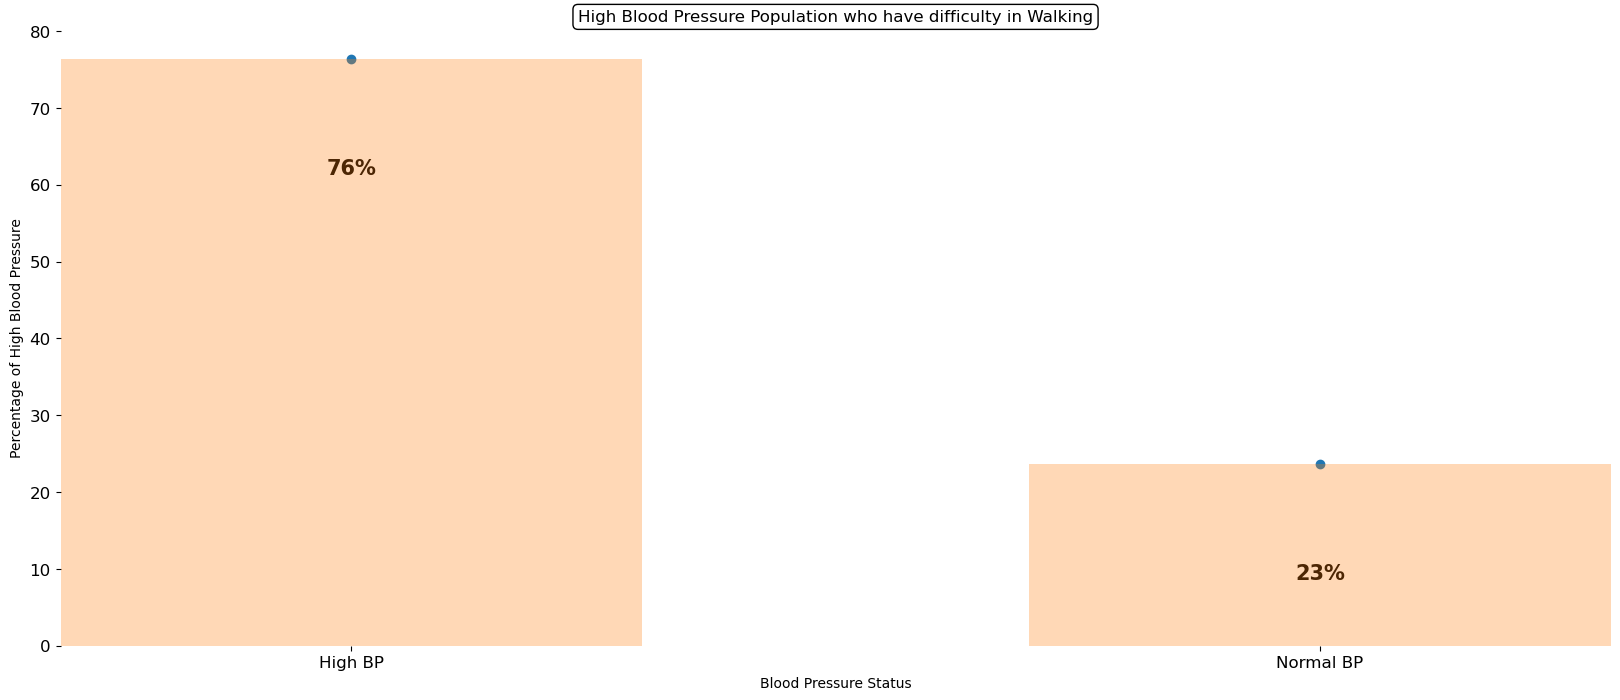

In [29]:
plt.figure(figsize=(20,8))
plt.margins(x=0)
X=['High BP','Normal BP']
plt.scatter(X,dw['HighBP'],zorder=3)
b=plt.bar(X,dw['HighBP'],zorder=11,alpha=0.3,width=0.6)

plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Blood Pressure Status')
plt.ylabel('Percentage of High Blood Pressure')
plt.title('High Blood Pressure Population who have difficulty in Walking',bbox=dict(facecolor='w'
                                                                        ,edgecolor='k', boxstyle='round'))

#text Insertion
for bar in b:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 15, str(int(height)) + '%',
                   ha='center', color='k', fontsize=15,fontweight='bold')                                                                                             

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

### Observation
- The people with difficulty in walking have most probably have high Blood Pressure
- 76% of Population have Blood Pressure

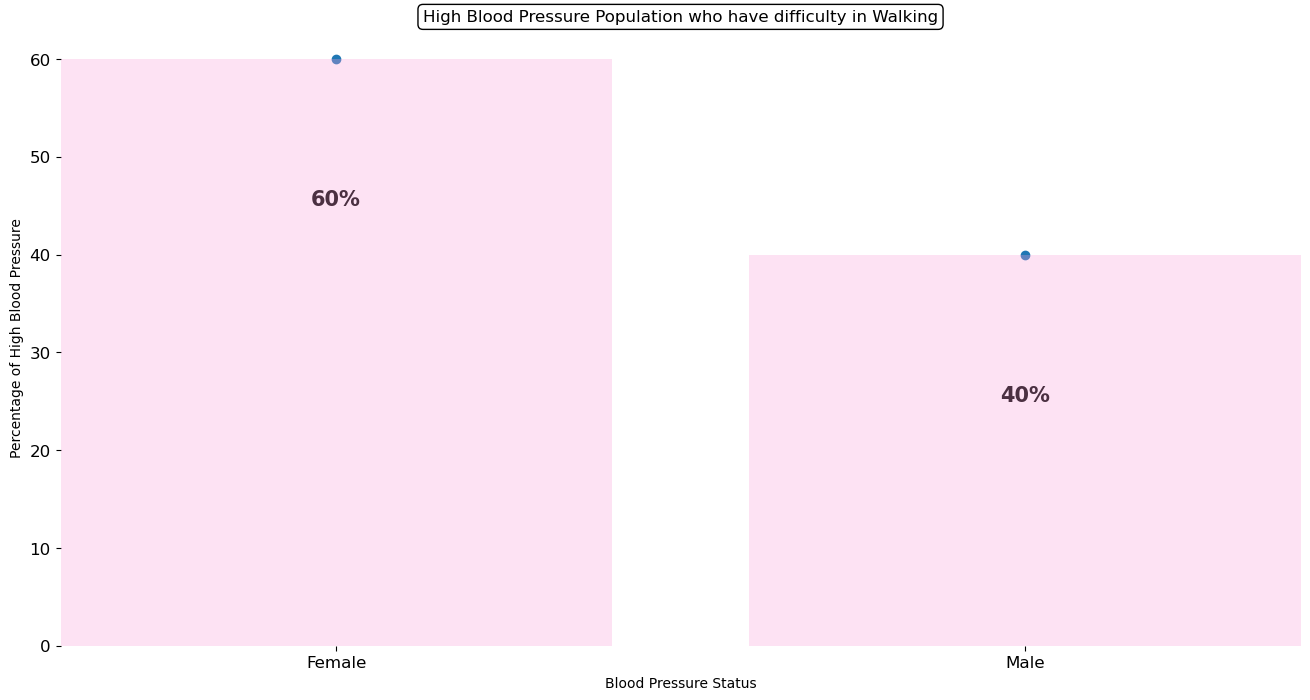

In [30]:
plt.figure(figsize=(16,8))
plt.margins(x=0)
X=['Female','Male']
plt.scatter(X,[60,40],zorder=3)
b=plt.bar(X,[60,40],zorder=11,alpha=0.3,color='#F9A1DA')

plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Blood Pressure Status')
plt.ylabel('Percentage of High Blood Pressure')
plt.title('High Blood Pressure Population who have difficulty in Walking',bbox=dict(facecolor='w'
                                                                        ,edgecolor='k', boxstyle='round'))
#text Insertion
for bar in b:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 15, str(int(height)) + '%',
                   ha='center', color='k', fontsize=15,fontweight='bold')                                                                                             

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

### Observation
- On the previous graph, we saw total 76% of people have high blood pressure who have the difficulty in walking
- In this graph we can see that on that 76% of entire population, 60% are females and 40% are males
- Female are more likely to have high blood pressure than males

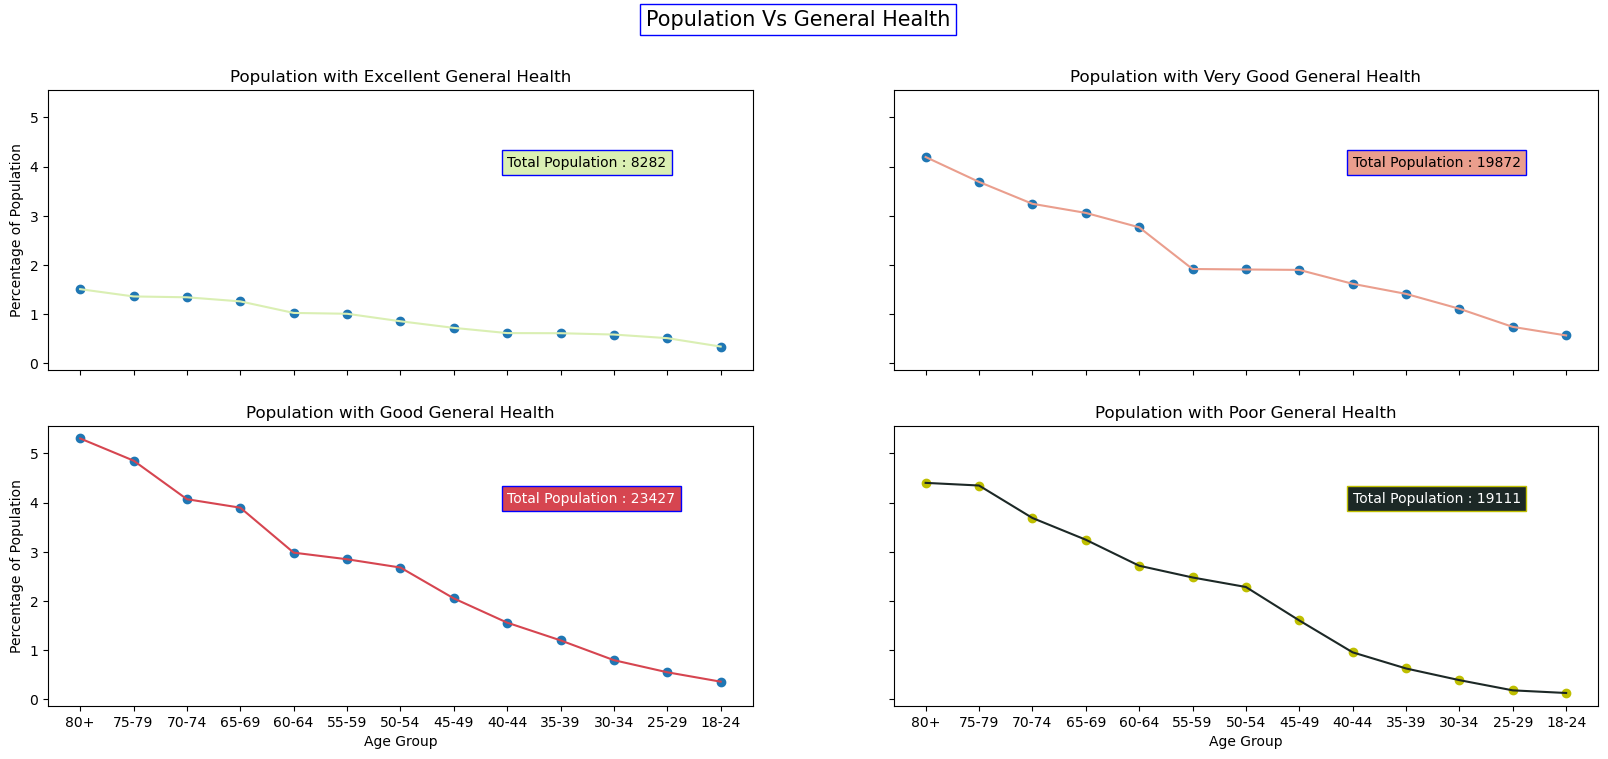

In [31]:
#General Health Parameters
#1 = excellent
#2 = very good
#3 = good
#4 = fair
#5 = poor

#Figure Creation
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,8),sharey=True,sharex=True)

#Plot 1
ax1.plot(a[::-1],hdf[(hdf.GenHlth==1)].Age.value_counts()/706.92,color='#DAEFB3')
ax1.scatter(a[::-1],hdf[(hdf.GenHlth==1)].Age.value_counts()/706.92)

#Plot2
ax2.plot(a[::-1],hdf[(hdf.GenHlth==2)].Age.value_counts()/706.92,color='#EA9E8D')
ax2.scatter(a[::-1],hdf[(hdf.GenHlth==2)].Age.value_counts()/706.92)

#plot3
ax3.plot(a[::-1],hdf[(hdf.GenHlth==3)].Age.value_counts()/706.92,color='#D64550')
ax3.scatter(a[::-1],hdf[(hdf.GenHlth==3)].Age.value_counts()/706.92)

#plot4
ax4.plot(a[::-1],hdf[(hdf.GenHlth>=4)].Age.value_counts()/706.92,color='#1C2826')
ax4.scatter(a[::-1],hdf[(hdf.GenHlth>=4)].Age.value_counts()/706.92,color='y')

#Titles
ax1.set_title('Population with Excellent General Health')
ax2.set_title('Population with Very Good General Health')
ax3.set_title('Population with Good General Health')
ax4.set_title('Population with Poor General Health')

#Labels
ax1.set_ylabel('Percentage of Population')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Percentage of Population')
ax4.set_xlabel('Age Group')

#Text Insertion
ax1.text(8,4,'Total Population : 8282',bbox=dict(facecolor='#DAEFB3',edgecolor='b'))
ax2.text(8,4,'Total Population : 19872',bbox=dict(facecolor='#EA9E8D',edgecolor='b'))
ax3.text(8,4,'Total Population : 23427',color='w',bbox=dict(facecolor='#D64550',edgecolor='b'))
ax4.text(8,4,'Total Population : 19111',color='w',bbox=dict(facecolor='#1C2826',edgecolor='y'))

#Overall Title
plt.suptitle('Population Vs General Health',bbox=dict(facecolor='w',edgecolor='b'),fontsize=15)    

plt.show()    

### Observation: 
- I have plotted 4 graphs for 4 type of General Health : 1,2,3, >=4
- I found from the graph that :-
 1. Most population are lying under Normal Health Group (Rating : 3)
 2. Only 11% Population have excellent health
 3. 18-24 Age group people are mostly populated under Very Good health Group(Rating : 2)
 4. Total 27% Population have very bad health
 5. 61% Population have Good to Moderate health condition

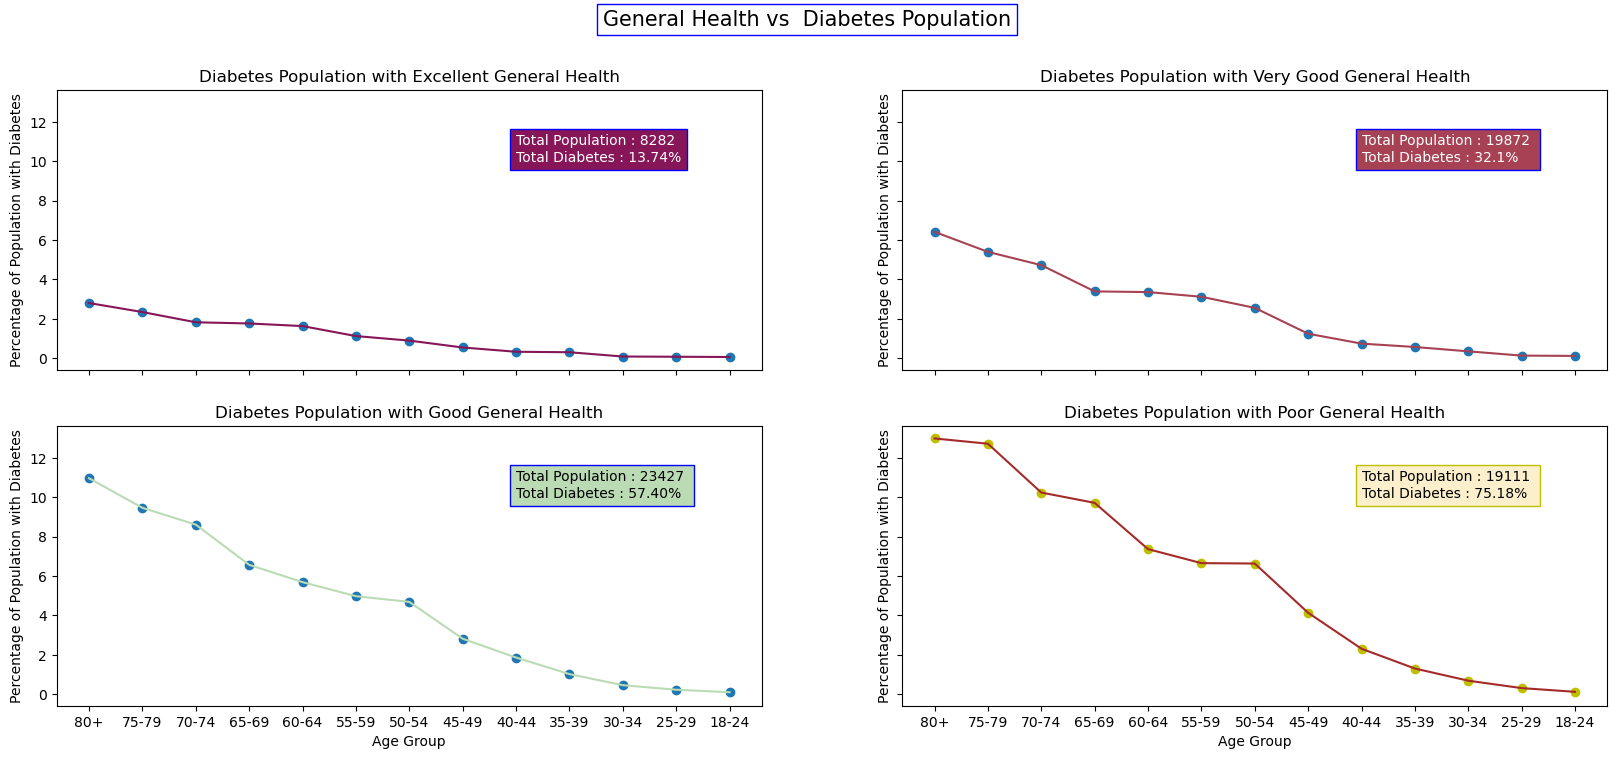

In [32]:
#General Health Parameters
#1 = excellent
#2 = very good
#3 = good
#4 = fair
#5 = poor

#Figure Creation
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,8),sharey=True,sharex=True)

#Plot 1
ax1.plot(a[::-1],hdf[(hdf.GenHlth==1) & (hdf.Diabetes ==1 )].Age.value_counts()/82.82,color='#861657')
ax1.scatter(a[::-1],hdf[(hdf.GenHlth==1) & (hdf.Diabetes ==1 )].Age.value_counts()/82.82)

#Plot2
ax2.plot(a[::-1],hdf[(hdf.GenHlth==2) & (hdf.Diabetes ==1 )].Age.value_counts()/198.72,color='#A64253')
ax2.scatter(a[::-1],hdf[(hdf.GenHlth==2) & (hdf.Diabetes ==1 )].Age.value_counts()/198.72)

#plot3
ax3.plot(a[::-1],hdf[(hdf.GenHlth==3) & (hdf.Diabetes ==1 )].Age.value_counts()/234.27,color='#BBDBB4')
ax3.scatter(a[::-1],hdf[(hdf.GenHlth==3) & (hdf.Diabetes ==1 )].Age.value_counts()/234.27)

#plot4
ax4.plot(a[::-1],hdf[(hdf.GenHlth>=4) & (hdf.Diabetes ==1 )].Age.value_counts()/191.11,color='brown')
ax4.scatter(a[::-1],hdf[(hdf.GenHlth>=4) & (hdf.Diabetes ==1 )].Age.value_counts()/191.11,color='y')

#Titles
ax1.set_title('Diabetes Population with Excellent General Health')
ax2.set_title('Diabetes Population with Very Good General Health')
ax3.set_title('Diabetes Population with Good General Health')
ax4.set_title('Diabetes Population with Poor General Health')

#Labels
ax1.set_ylabel('Percentage of Population with Diabetes')
ax2.set_ylabel('Percentage of Population with Diabetes')
ax3.set_ylabel('Percentage of Population with Diabetes')
ax3.set_xlabel('Age Group')
ax4.set_ylabel('Percentage of Population with Diabetes')
ax4.set_xlabel('Age Group')

#Text Insertion
ax1.text(8,10,'Total Population : 8282 \nTotal Diabetes : 13.74%',bbox=dict(facecolor='#861657',edgecolor='b'),color='w')
ax2.text(8,10,'Total Population : 19872 \nTotal Diabetes : 32.1%',bbox=dict(facecolor='#A64253',edgecolor='b'),color='w')
ax3.text(8,10,'Total Population : 23427 \nTotal Diabetes : 57.40%',color='k',bbox=dict(facecolor='#BBDBB4',edgecolor='b'))
ax4.text(8,10,'Total Population : 19111 \nTotal Diabetes : 75.18%',color='k',bbox=dict(facecolor='#FCF0CC',edgecolor='y'))

#Overall Title
plt.suptitle('General Health vs  Diabetes Population',bbox=dict(facecolor='w',edgecolor='b'),fontsize=15)    

plt.show()    

### Observation :
- I have plotted graphs between General Health Condition and Diabetes (Positive)
- I found that :
  1. Population with Bad Health have 75 % Diabetic Patient in it
  2. Population with Excellent Health have very less diabetic patient, only 14%
  3. People with Moderate health condition have diabetes of 57% of it's population
  4. Total Population is 70692, out of which 35346 which is 50% of entire population have diabetes

In [33]:
BMI1=hdf[(hdf.Stroke==1)].BMI.value_counts()/43.95
bmi=pd.DataFrame(BMI1,index=None)
bmi.sort_index(axis=0,inplace=True)
BMI=list(bmi.index)
BMI.sort()

In [34]:
HBP=hdf[(hdf.HighBP==1)].BMI.value_counts()/398.32
hbp = pd.DataFrame(HBP,index=None)
hbp.sort_index(axis=0,inplace=True)
hbp_l=list(hbp.index)
hbp_l.sort()

In [35]:
dbt= (pd.DataFrame((hdf[(hdf.Diabetes == 1)].BMI.value_counts()/353.46),index=None))
dbt.sort_index(axis=0,inplace=True)
dbt_l = list(dbt.index)
dbt_l.sort()

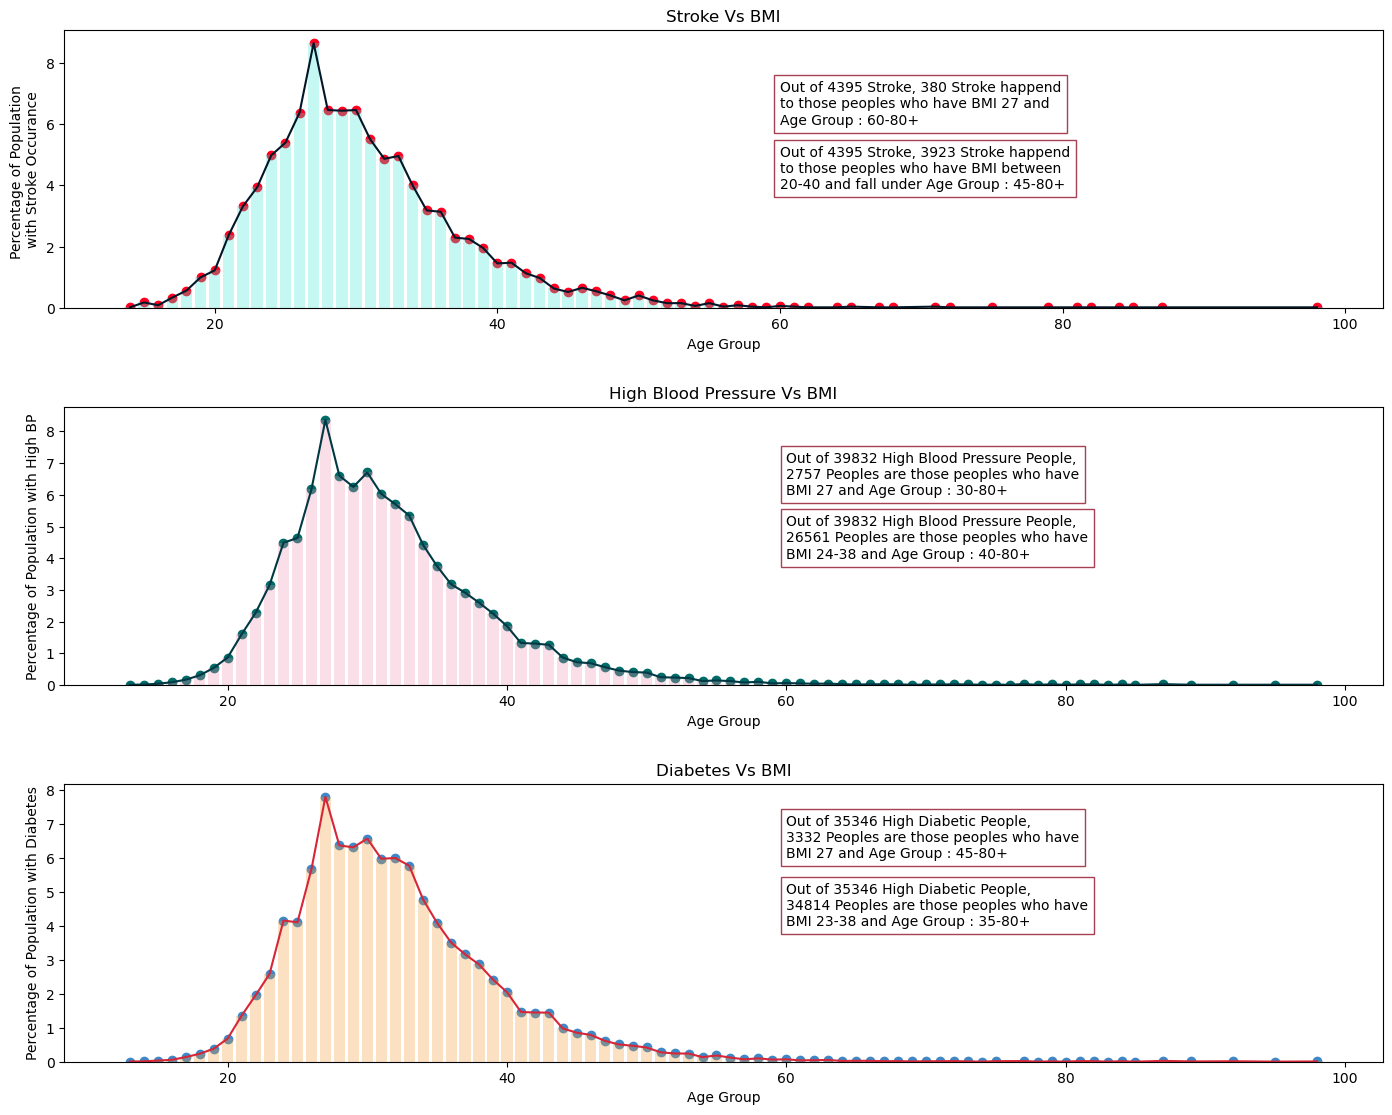

In [36]:
#BMI : Body Mass Index

#Figure Creation
fig,((ax1),(ax2),(ax3)) = plt.subplots(3,1,figsize=(15,12))
fig.tight_layout(pad=5.0)

#Plot 1
ax1.plot(BMI,bmi['BMI'],color='#011627')
ax1.scatter(BMI,bmi['BMI'],color='#FF0022')
ax1.bar(BMI,bmi['BMI'],alpha=0.3,color='#41EAD4')

#Plot2
ax2.plot(hbp_l,hbp['BMI'],color='#003844')
ax2.scatter(hbp_l,hbp['BMI'],color='#006C67')
ax2.bar(hbp_l,hbp['BMI'],alpha=0.3,color='#F194B4')

#plot3
ax3.plot(dbt_l,dbt['BMI'],color='#D72638')
ax3.scatter(dbt_l,dbt['BMI'],color='#3F88C5')
ax3.bar(dbt_l,dbt['BMI'],alpha=0.3,color='#F49D37')

#Titles
ax1.set_title('Stroke Vs BMI')
ax2.set_title('High Blood Pressure Vs BMI')
ax3.set_title('Diabetes Vs BMI')

#Labels
ax1.set_ylabel('Percentage of Population \nwith Stroke Occurance')
ax2.set_ylabel('Percentage of Population with High BP')
ax3.set_ylabel('Percentage of Population with Diabetes')
ax3.set_xlabel('Age Group')
ax2.set_xlabel('Age Group')
ax1.set_xlabel('Age Group')

#Text Insertion
ax1.text(60,6,'Out of 4395 Stroke, 380 Stroke happend\nto those peoples who have BMI 27 and\nAge Group : 60-80+'
                                                          ,bbox=dict(facecolor='w',edgecolor='#A64253'),color='k')
ax1.text(60,3.9,'Out of 4395 Stroke, 3923 Stroke happend\nto those peoples who have BMI between \n20-40 and fall under Age Group : 45-80+'
                                                          ,bbox=dict(facecolor='w',edgecolor='#A64253'),color='k')

ax2.text(60,6,'Out of 39832 High Blood Pressure People,\n2757 Peoples are those peoples who have\nBMI 27 and Age Group : 30-80+'
                                                          ,bbox=dict(facecolor='w',edgecolor='#A64253'),color='k')
ax2.text(60,4,'Out of 39832 High Blood Pressure People,\n26561 Peoples are those peoples who have\nBMI 24-38 and Age Group : 40-80+'
                                                          ,bbox=dict(facecolor='w',edgecolor='#A64253'),color='k')

ax3.text(60,6,'Out of 35346 High Diabetic People,\n3332 Peoples are those peoples who have\nBMI 27 and Age Group : 45-80+'
                                                          ,bbox=dict(facecolor='w',edgecolor='#A64253'),color='k')
ax3.text(60,4,'Out of 35346 High Diabetic People,\n34814 Peoples are those peoples who have\nBMI 23-38 and Age Group : 35-80+'
                                                          ,bbox=dict(facecolor='w',edgecolor='#A64253'),color='k')

plt.show()    

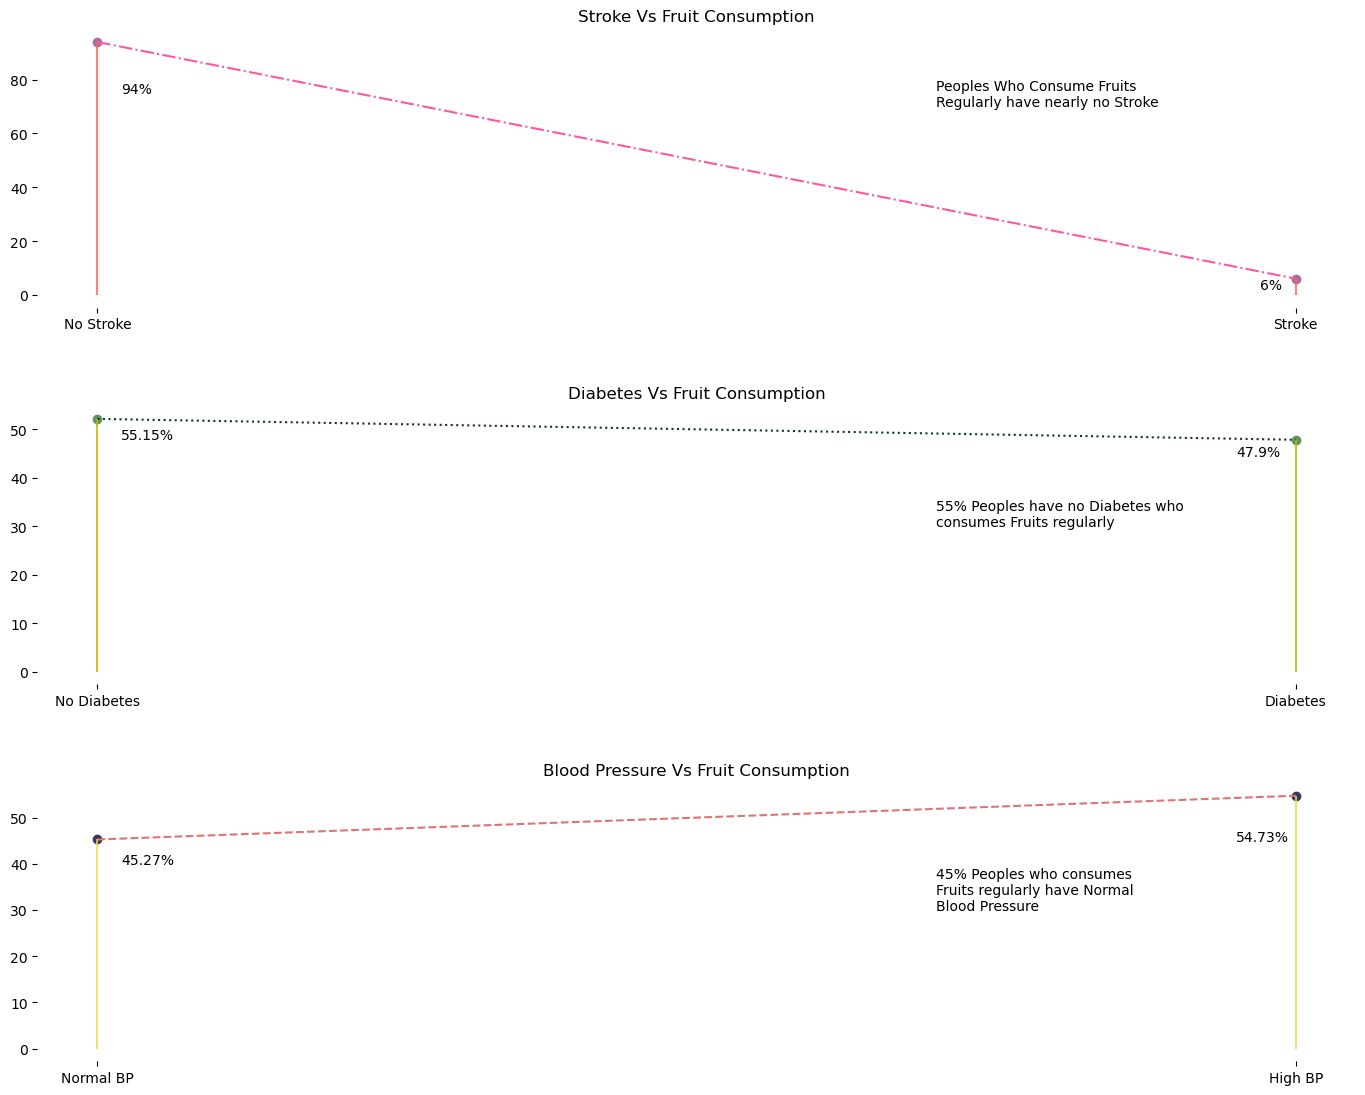

In [37]:
#Figure Creation
fig,((ax1),(ax2),(ax3)) = plt.subplots(3,1,figsize=(15,12))
fig.tight_layout(pad=5.0)

#Plot 2
ax2.plot(['No Diabetes','Diabetes'],(list(hdf[(hdf.Fruits==1)].Diabetes.value_counts()/432.49)),ls=':',color='#14342b')
ax2.scatter(['No Diabetes','Diabetes'],(list(hdf[(hdf.Fruits==1)].Diabetes.value_counts()/432.49)),color='#60935D')
ax2.vlines(x=['No Diabetes','Diabetes'],ymin=0,ymax=(list(hdf[(hdf.Fruits==1)].Diabetes.value_counts()/432.49)),alpha=0.8,color='#BAB700')

#Plot1
ax1.plot(['No Stroke','Stroke'],(list(hdf[(hdf.Fruits==1)].Stroke.value_counts()/432.49)),ls='-.',color='#FF579F')
ax1.scatter(['No Stroke','Stroke'],(list(hdf[(hdf.Fruits==1)].Stroke.value_counts()/432.49)),color='#AA6DA3')
ax1.vlines(x=['No Stroke','Stroke'],ymin=0,ymax=(list(hdf[(hdf.Fruits==1)].Stroke.value_counts()/432.49)),alpha=0.8,color='#FE654F')

#plot3
ax3.plot(['Normal BP','High BP'],(list(hdf[(hdf.Fruits==1)].HighBP.value_counts()/432.49)[::-1]),ls='--',color='#DD7373')
ax3.scatter(['Normal BP','High BP'],(list(hdf[(hdf.Fruits==1)].HighBP.value_counts()/432.49)[::-1]),color='#3B3561')
ax3.vlines(x=['Normal BP','High BP'],ymin=0,ymax=(list(hdf[(hdf.Fruits==1)].HighBP.value_counts()/432.49)[::-1]),alpha=0.8,color='#EAD94C')

#Text Insertion
ax1.text(0.02,75,'94%')
ax1.text(0.97,2,'6%')
ax1.text(0.7,70,'Peoples Who Consume Fruits\nRegularly have nearly no Stroke')

ax2.text(0.02,48,'55.15%')
ax2.text(0.95,44.5,'47.9%')
ax2.text(0.7,30,'55% Peoples have no Diabetes who\nconsumes Fruits regularly')

ax3.text(0.02,40,'45.27%')
ax3.text(0.95,45,'54.73%')
ax3.text(0.7,30,'45% Peoples who consumes\nFruits regularly have Normal \nBlood Pressure')

#Title
ax1.set_title('Stroke Vs Fruit Consumption')
ax2.set_title('Diabetes Vs Fruit Consumption')
ax3.set_title('Blood Pressure Vs Fruit Consumption')

# remove the frame of the chart
for spine in ax1.spines.values():
    spine.set_visible(False)
    
for spine in ax2.spines.values():
    spine.set_visible(False)
    
for spine in ax3.spines.values():
    spine.set_visible(False)

plt.show()

In [38]:
(hdf[(hdf.Veggies==1)].HighBP.value_counts()/557.60)

1.0    54.63594
0.0    45.36406
Name: HighBP, dtype: float64

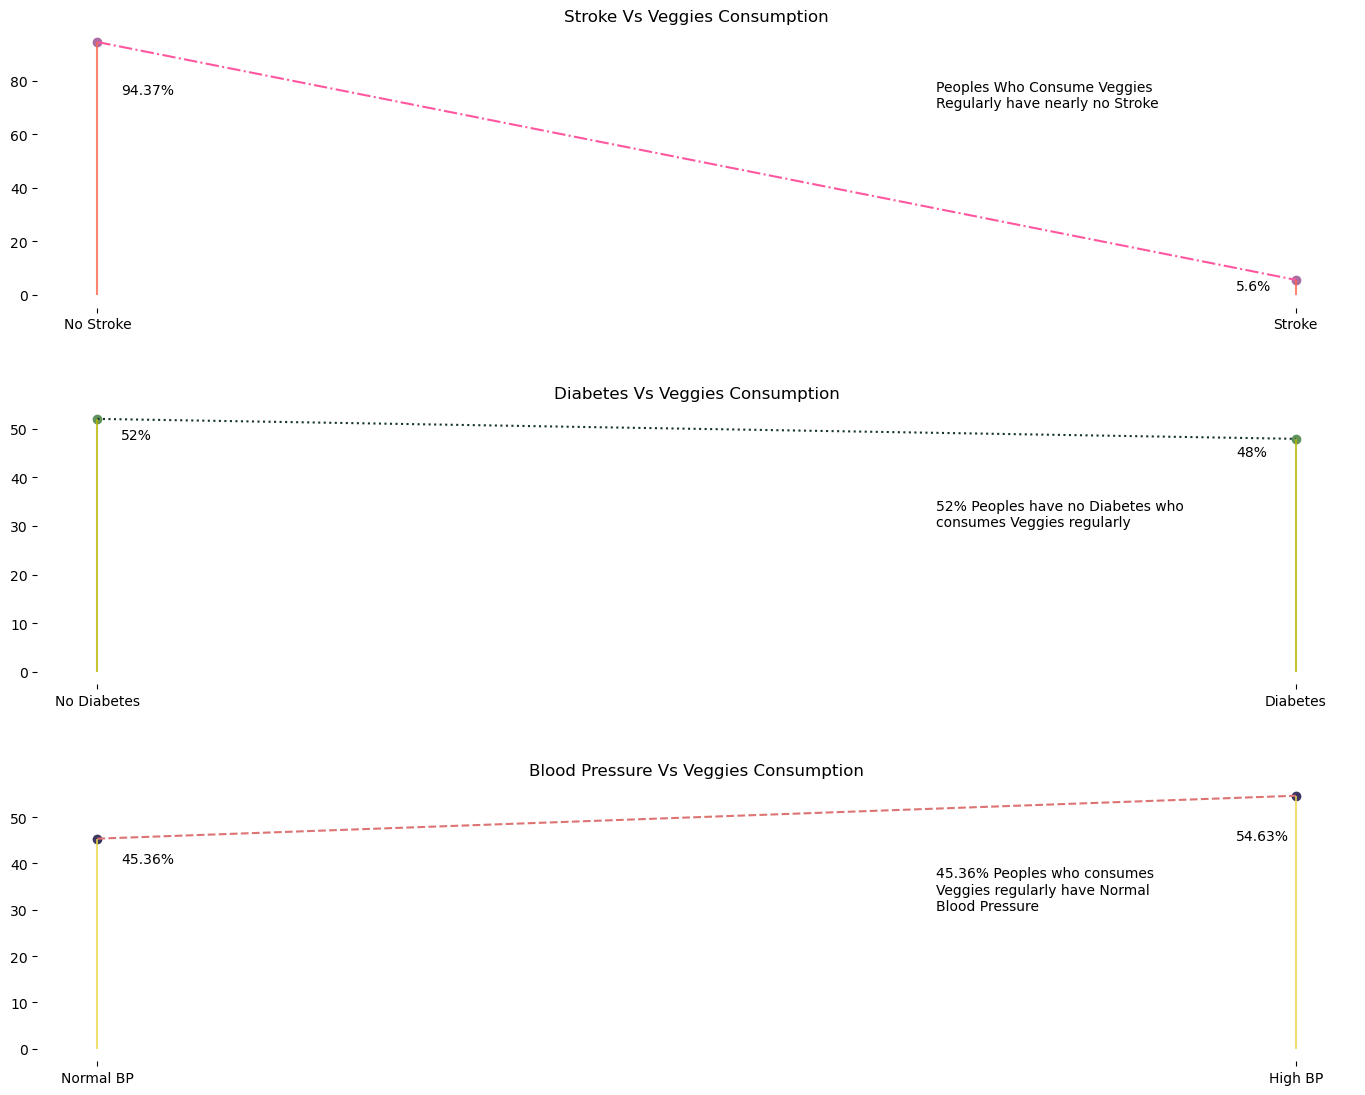

In [39]:
#Figure Creation
fig,((ax1),(ax2),(ax3)) = plt.subplots(3,1,figsize=(15,12))
fig.tight_layout(pad=5.0)

#Plot 2
ax2.plot(['No Diabetes','Diabetes'],(list(hdf[(hdf.Veggies==1)].Diabetes.value_counts()/557.60)),ls=':',color='#14342b')
ax2.scatter(['No Diabetes','Diabetes'],(list(hdf[(hdf.Veggies==1)].Diabetes.value_counts()/557.60)),color='#60935D')
ax2.vlines(x=['No Diabetes','Diabetes'],ymin=0,ymax=(list(hdf[(hdf.Veggies==1)].Diabetes.value_counts()/557.60)),alpha=0.8,color='#BAB700')

#Plot1
ax1.plot(['No Stroke','Stroke'],(list(hdf[(hdf.Veggies==1)].Stroke.value_counts()/557.60)),ls='-.',color='#FF579F')
ax1.scatter(['No Stroke','Stroke'],(list(hdf[(hdf.Veggies==1)].Stroke.value_counts()/557.60)),color='#AA6DA3')
ax1.vlines(x=['No Stroke','Stroke'],ymin=0,ymax=(list(hdf[(hdf.Veggies==1)].Stroke.value_counts()/557.60)),alpha=0.8,color='#FE654F')

#plot3
ax3.plot(['Normal BP','High BP'],(list(hdf[(hdf.Veggies==1)].HighBP.value_counts()/557.60)[::-1]),ls='--',color='#DD7373')
ax3.scatter(['Normal BP','High BP'],(list(hdf[(hdf.Veggies==1)].HighBP.value_counts()/557.60)[::-1]),color='#3B3561')
ax3.vlines(x=['Normal BP','High BP'],ymin=0,ymax=(list(hdf[(hdf.Veggies==1)].HighBP.value_counts()/557.60)[::-1]),alpha=0.8,color='#EAD94C')

#Text Insertion
ax1.text(0.02,75,'94.37%')
ax1.text(0.95,1.9,'5.6%')
ax1.text(0.7,70,'Peoples Who Consume Veggies\nRegularly have nearly no Stroke')

ax2.text(0.02,48,'52%')
ax2.text(0.95,44.5,'48%')
ax2.text(0.7,30,'52% Peoples have no Diabetes who\nconsumes Veggies regularly')

ax3.text(0.02,40,'45.36%')
ax3.text(0.95,45,'54.63%')
ax3.text(0.7,30,'45.36% Peoples who consumes\nVeggies regularly have Normal \nBlood Pressure')

#Title
ax1.set_title('Stroke Vs Veggies Consumption')
ax2.set_title('Diabetes Vs Veggies Consumption')
ax3.set_title('Blood Pressure Vs Veggies Consumption')

# remove the frame of the chart
for spine in ax1.spines.values():
    spine.set_visible(False)
    
for spine in ax2.spines.values():
    spine.set_visible(False)
    
for spine in ax3.spines.values():
    spine.set_visible(False)

plt.show()

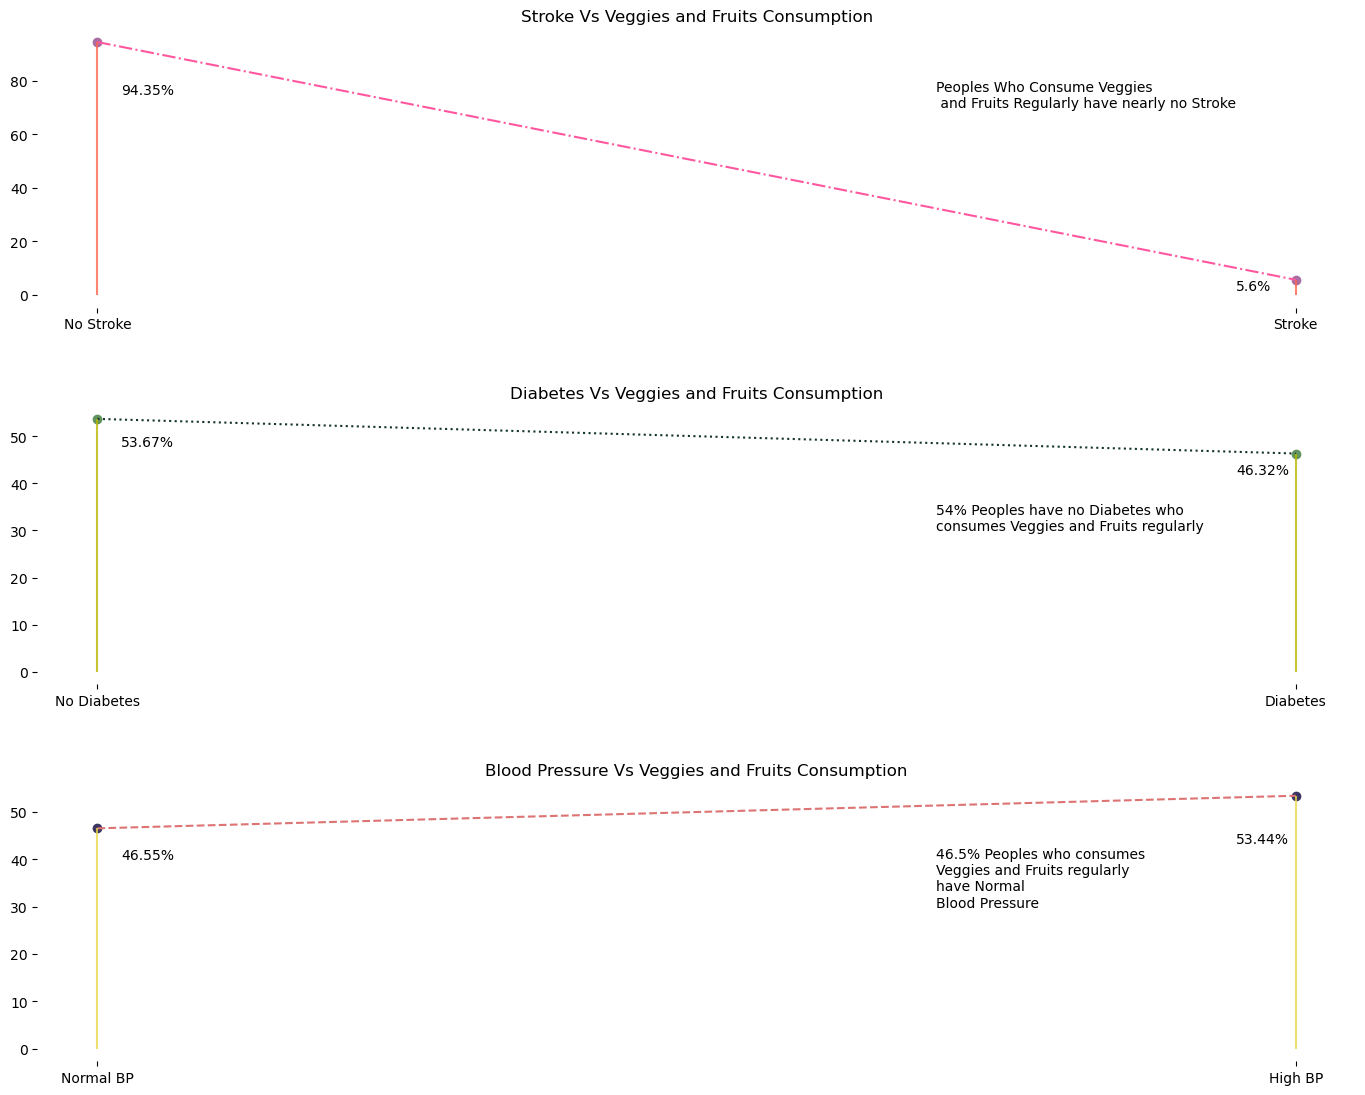

In [40]:
#Figure Creation
fig,((ax1),(ax2),(ax3)) = plt.subplots(3,1,figsize=(15,12))
fig.tight_layout(pad=5.0)

#Plot 2
ax2.plot(['No Diabetes','Diabetes'],list(hdf[(hdf.Veggies == 1) & (hdf.Fruits == 1)].Diabetes.value_counts()/374.69),ls=':',color='#14342b')
ax2.scatter(['No Diabetes','Diabetes'],list(hdf[(hdf.Veggies == 1) & (hdf.Fruits == 1)].Diabetes.value_counts()/374.69),color='#60935D')
ax2.vlines(x=['No Diabetes','Diabetes'],ymin=0,ymax=list(hdf[(hdf.Veggies == 1) & (hdf.Fruits == 1)].Diabetes.value_counts()/374.69),alpha=0.8,color='#BAB700')

#Plot1
ax1.plot(['No Stroke','Stroke'],list(hdf[(hdf.Veggies == 1) & (hdf.Fruits == 1)].Stroke.value_counts()/374.69),ls='-.',color='#FF579F')
ax1.scatter(['No Stroke','Stroke'],list(hdf[(hdf.Veggies == 1) & (hdf.Fruits == 1)].Stroke.value_counts()/374.69),color='#AA6DA3')
ax1.vlines(x=['No Stroke','Stroke'],ymin=0,ymax=list(hdf[(hdf.Veggies == 1) & (hdf.Fruits == 1)].Stroke.value_counts()/374.69),alpha=0.8,color='#FE654F')

#plot3
ax3.plot(['Normal BP','High BP'],list(hdf[(hdf.Veggies == 1) & (hdf.Fruits == 1)].HighBP.value_counts()/374.69)[::-1],ls='--',color='#DD7373')
ax3.scatter(['Normal BP','High BP'],list(hdf[(hdf.Veggies == 1) & (hdf.Fruits == 1)].HighBP.value_counts()/374.69)[::-1],color='#3B3561')
ax3.vlines(x=['Normal BP','High BP'],ymin=0,ymax=list(hdf[(hdf.Veggies == 1) & (hdf.Fruits == 1)].HighBP.value_counts()/374.69)[::-1],alpha=0.8,color='#EAD94C')

#Text Insertion
ax1.text(0.02,75,'94.35%')
ax1.text(0.95,1.9,'5.6%')
ax1.text(0.7,70,'Peoples Who Consume Veggies\n and Fruits Regularly have nearly no Stroke')

ax2.text(0.02,48,'53.67%')
ax2.text(0.95,42,'46.32%')
ax2.text(0.7,30,'54% Peoples have no Diabetes who\nconsumes Veggies and Fruits regularly')

ax3.text(0.02,40,'46.55%')
ax3.text(0.95,43.5,'53.44%')
ax3.text(0.7,30,'46.5% Peoples who consumes\nVeggies and Fruits regularly \nhave Normal \nBlood Pressure')

#Title
ax1.set_title('Stroke Vs Veggies and Fruits Consumption')
ax2.set_title('Diabetes Vs Veggies and Fruits Consumption')
ax3.set_title('Blood Pressure Vs Veggies and Fruits Consumption')

# remove the frame of the chart
for spine in ax1.spines.values():
    spine.set_visible(False)
    
for spine in ax2.spines.values():
    spine.set_visible(False)
    
for spine in ax3.spines.values():
    spine.set_visible(False)

plt.show()

In [41]:
ph=pd.DataFrame(hdf[(hdf.HeartDiseaseorAttack==1)].PhysHlth.value_counts()/104.49)
ph.sort_index(axis=0,inplace=True)

In [42]:
B=pd.DataFrame(hdf[(hdf.HeartDiseaseorAttack==1)].BMI.value_counts()/104.49)
B.sort_index(axis=0,inplace=True)

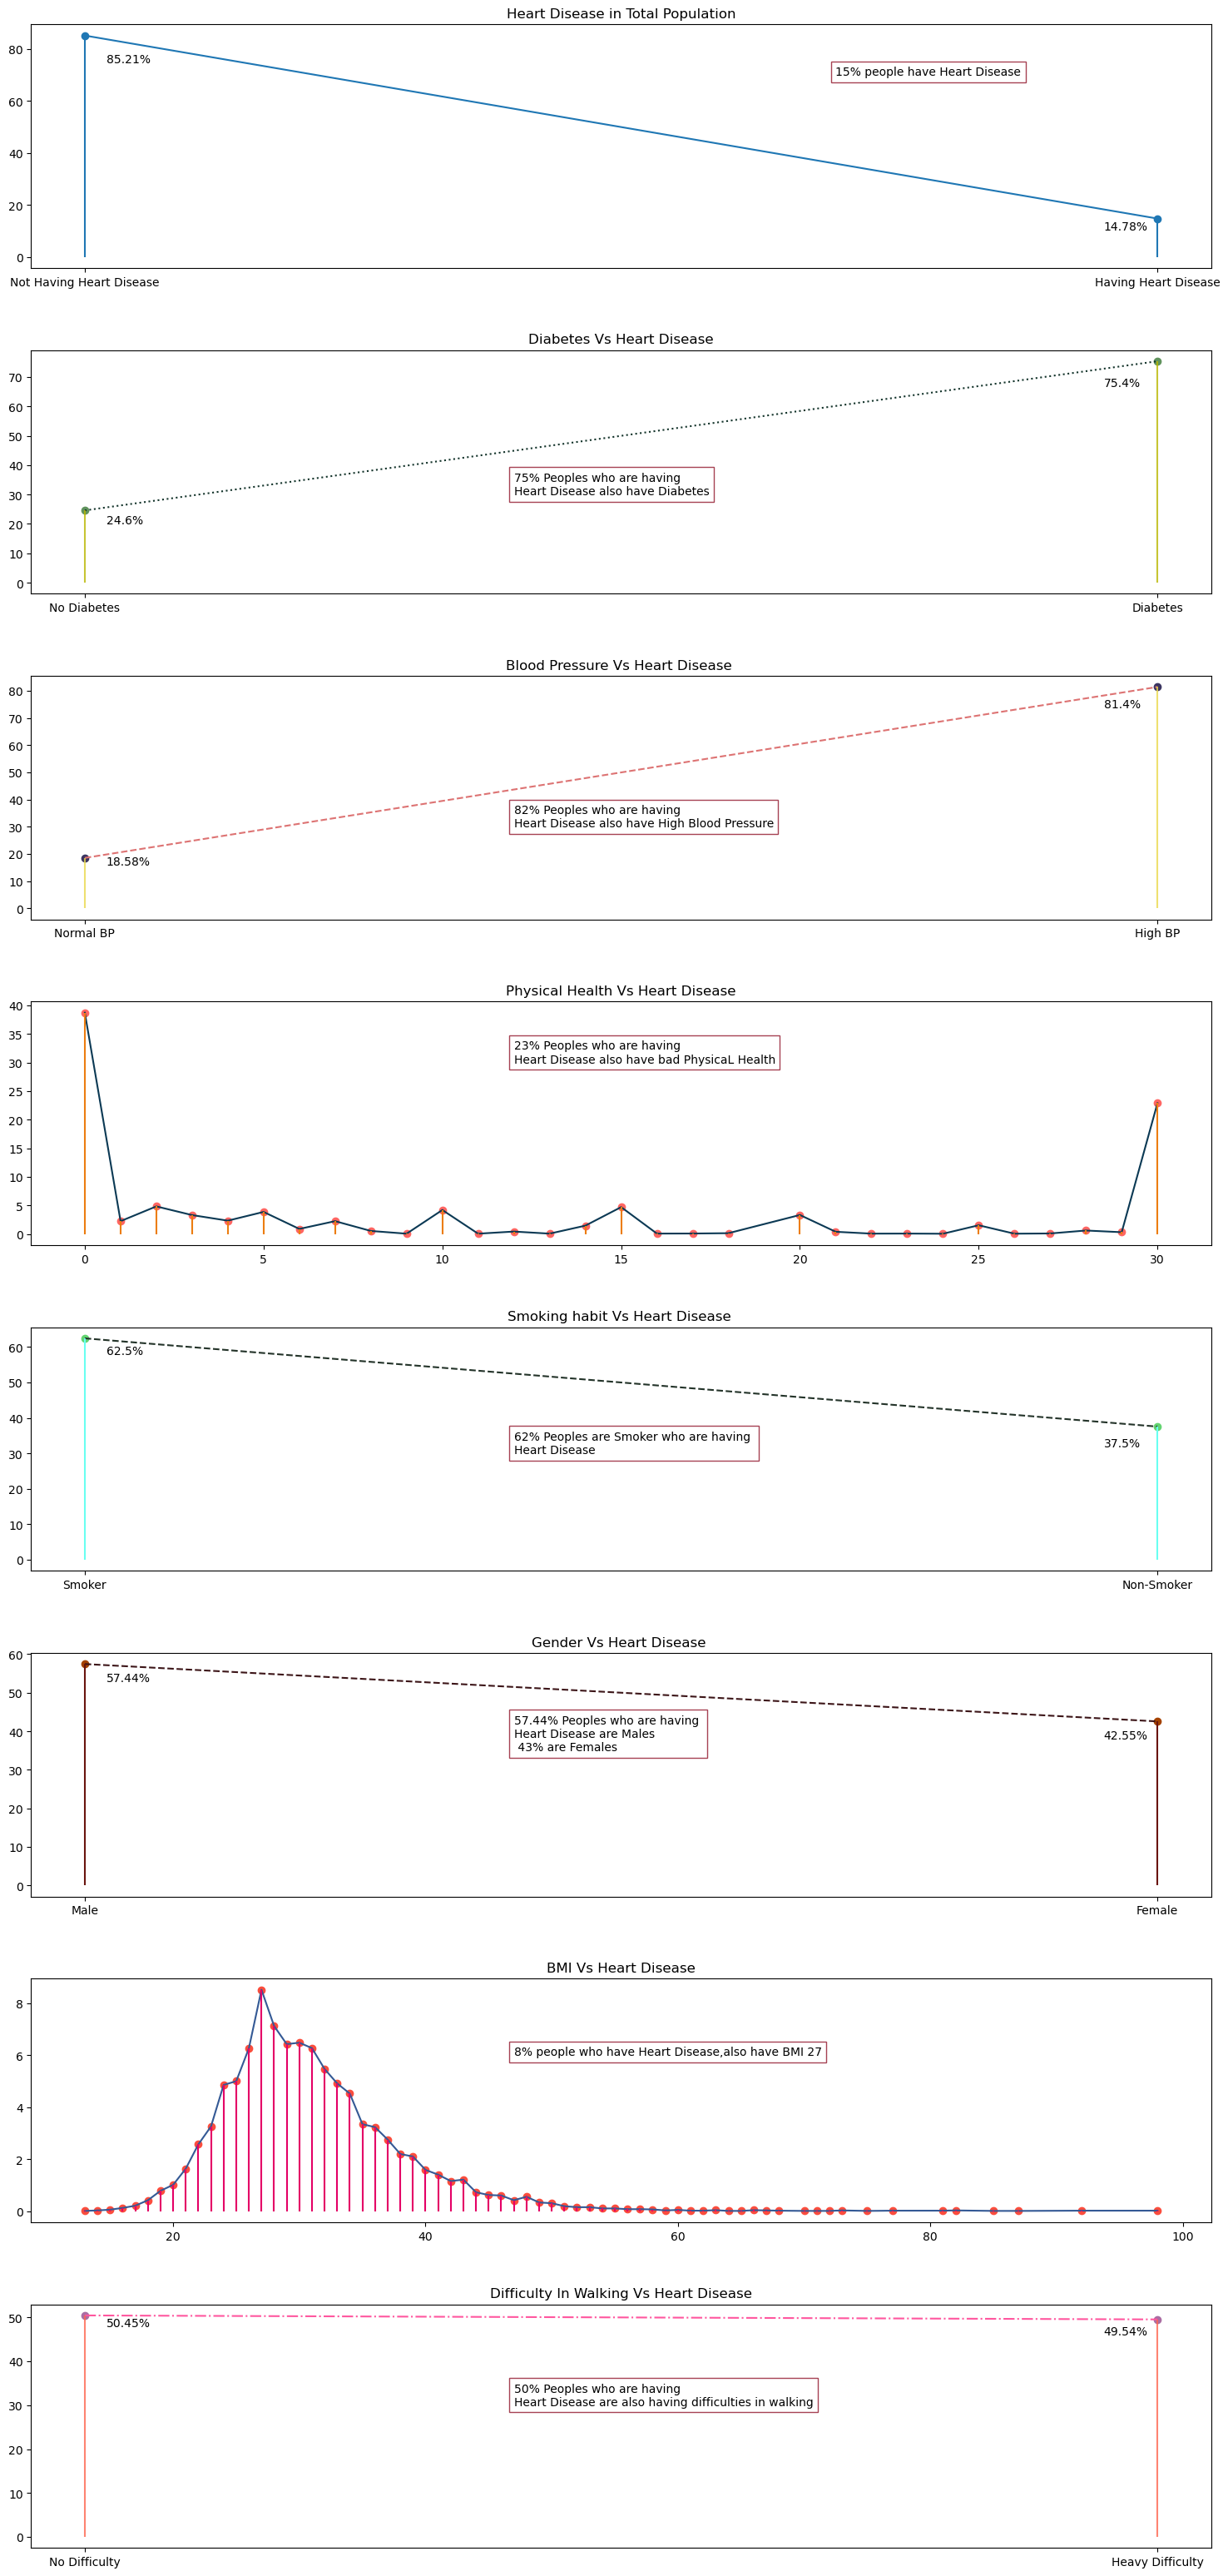

In [43]:
#Figure Creation
fig,((ax1),(ax2),(ax3),(ax4),(ax5),(ax6),(ax7),(ax8)) = plt.subplots(8,1,figsize=(16,32))
fig.tight_layout(pad=5.0)

#Plot1
ax1.plot(['Not Having Heart Disease','Having Heart Disease'],list(hdf.HeartDiseaseorAttack.value_counts()/706.92))
ax1.scatter(['Not Having Heart Disease','Having Heart Disease'],list(hdf.HeartDiseaseorAttack.value_counts()/706.92))
ax1.vlines(x=['Not Having Heart Disease','Having Heart Disease'],ymin=0,ymax=list(hdf.HeartDiseaseorAttack.value_counts()/706.92))

#Plot 2
ax2.plot(['No Diabetes','Diabetes'],list(hdf[(hdf.HeartDiseaseorAttack==1)].Diabetes.value_counts()/104.49)[::-1],ls=':',color='#14342b')
ax2.scatter(['No Diabetes','Diabetes'],list(hdf[(hdf.HeartDiseaseorAttack==1)].Diabetes.value_counts()/104.49)[::-1],color='#60935D')
ax2.vlines(x=['No Diabetes','Diabetes'],ymin=0,ymax=list(hdf[(hdf.HeartDiseaseorAttack==1)].Diabetes.value_counts()/104.49)[::-1],alpha=0.8,color='#BAB700')

#plot3
ax3.plot(['Normal BP','High BP'],list(hdf[(hdf.HeartDiseaseorAttack==1)].HighBP.value_counts()/104.49)[::-1],ls='--',color='#DD7373')
ax3.scatter(['Normal BP','High BP'],list(hdf[(hdf.HeartDiseaseorAttack==1)].HighBP.value_counts()/104.49)[::-1],color='#3B3561')
ax3.vlines(x=['Normal BP','High BP'],ymin=0,ymax=list(hdf[(hdf.HeartDiseaseorAttack==1)].HighBP.value_counts()/104.49)[::-1],alpha=0.8,color='#EAD94C')

#Plot4
ax4.plot(ph.index,ph['PhysHlth'],color='#0b3954')
ax4.scatter(ph.index,ph['PhysHlth'],color='#ff6663')
ax4.vlines(x=ph.index,ymin=0,ymax=ph['PhysHlth'],color='#ec7d10')

#plot5
ax5.plot(['Smoker','Non-Smoker'],list(hdf[(hdf.HeartDiseaseorAttack==1)].Smoker.value_counts()/104.49),color='#233329',ls='--')
ax5.scatter(['Smoker','Non-Smoker'],list(hdf[(hdf.HeartDiseaseorAttack==1)].Smoker.value_counts()/104.49),color='#63d471')
ax5.vlines(x=['Smoker','Non-Smoker'],ymin=0,ymax=list(hdf[(hdf.HeartDiseaseorAttack==1)].Smoker.value_counts()/104.49),color='#69fff1')

#Plot6
ax6.plot(['Male','Female'],list(hdf[(hdf.HeartDiseaseorAttack==1)].Sex.value_counts()/104.49),color='#3c1518',ls='--')
ax6.scatter(['Male','Female'],list(hdf[(hdf.HeartDiseaseorAttack==1)].Sex.value_counts()/104.49),color='#a44200')
ax6.vlines(x=['Male','Female'],ymin=0,ymax=list(hdf[(hdf.HeartDiseaseorAttack==1)].Sex.value_counts()/104.49),color='#69140e')

#plot7
ax7.plot(B.index,B['BMI'],color='#345995')
ax7.scatter(B.index,B['BMI'],color='#fb4d3d')
ax7.vlines(x=B.index,ymin=0,ymax=B['BMI'],color='#e40066')

#Plot8
ax8.plot(['No Difficulty','Heavy Difficulty'],list(hdf[(hdf.HeartDiseaseorAttack==1)].DiffWalk.value_counts()/104.49),ls='-.',color='#FF579F')
ax8.scatter(['No Difficulty','Heavy Difficulty'],list(hdf[(hdf.HeartDiseaseorAttack==1)].DiffWalk.value_counts()/104.49),color='#AA6DA3')
ax8.vlines(x=['No Difficulty','Heavy Difficulty'],ymin=0,ymax=list(hdf[(hdf.HeartDiseaseorAttack==1)].DiffWalk.value_counts()/104.49),alpha=0.8,color='#FE654F')


#Text Insertion
ax1.text(0.02,75,'85.21%')
ax1.text(0.95,10.5,'14.78%')
ax1.text(0.7,70,'15% people have Heart Disease',bbox=dict(facecolor='w',edgecolor='#A64253'))

ax2.text(0.02,20,'24.6%')
ax2.text(0.95,67,'75.4%')
ax2.text(0.4,30,'75% Peoples who are having \nHeart Disease also have Diabetes',bbox=dict(facecolor='w',edgecolor='#A64253'))

ax3.text(0.02,16,'18.58%')
ax3.text(0.95,74,'81.4%')
ax3.text(0.4,30,'82% Peoples who are having \nHeart Disease also have High Blood Pressure',bbox=dict(facecolor='w',edgecolor='#A64253'))

ax4.text(12,30,'23% Peoples who are having \nHeart Disease also have bad PhysicaL Health',bbox=dict(facecolor='w',edgecolor='#A64253'))

ax5.text(0.02,58,'62.5%')
ax5.text(0.95,32,'37.5%')
ax5.text(0.4,30,'62% Peoples are Smoker who are having \nHeart Disease',bbox=dict(facecolor='w',edgecolor='#A64253'))

ax6.text(0.02,53,'57.44%')
ax6.text(0.95,38,'42.55%')
ax6.text(0.4,35,'57.44% Peoples who are having \nHeart Disease are Males\n 43% are Females',bbox=dict(facecolor='w',edgecolor='#A64253'))

ax7.text(47,6,'8% people who have Heart Disease,also have BMI 27',bbox=dict(facecolor='w',edgecolor='#A64253'))

ax8.text(0.02,48,'50.45%')
ax8.text(0.95,46,'49.54%')
ax8.text(0.4,30,'50% Peoples who are having \nHeart Disease are also having difficulties in walking',bbox=dict(facecolor='w',edgecolor='#A64253'))



#Title
ax1.set_title('Heart Disease in Total Population')
ax2.set_title('Diabetes Vs Heart Disease')
ax3.set_title('Blood Pressure Vs Heart Disease ')
ax4.set_title('Physical Health Vs Heart Disease')
ax5.set_title('Smoking habit Vs Heart Disease ')
ax6.set_title('Gender Vs Heart Disease ')
ax7.set_title('BMI Vs Heart Disease')
ax8.set_title('Difficulty In Walking Vs Heart Disease')

plt.show()

##### =========================================================================================================

### Outliers Detection and Removal

In [25]:
#BMI
Q1,Q3 = np.percentile(hdf['BMI'] , [25,75])
IQR1 = Q3- Q1
upper_range1 = Q3 + (1.5 * IQR1)

#MentHlth
Q1,Q3 = np.percentile(hdf['MentHlth'] , [25,75])
IQR2 = Q3- Q1
upper_range2 = Q3 + (1.5 * IQR2)

#PhysHlth
Q1,Q3 = np.percentile(hdf['PhysHlth'] , [25,75])
IQR3 = Q3- Q1
upper_range3 = Q3 + (1.5 * IQR3)

In [26]:
print(IQR1,IQR2,IQR3,upper_range1,upper_range2,upper_range3)

8.0 2.0 6.0 45.0 5.0 15.0


In [27]:
hdf.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

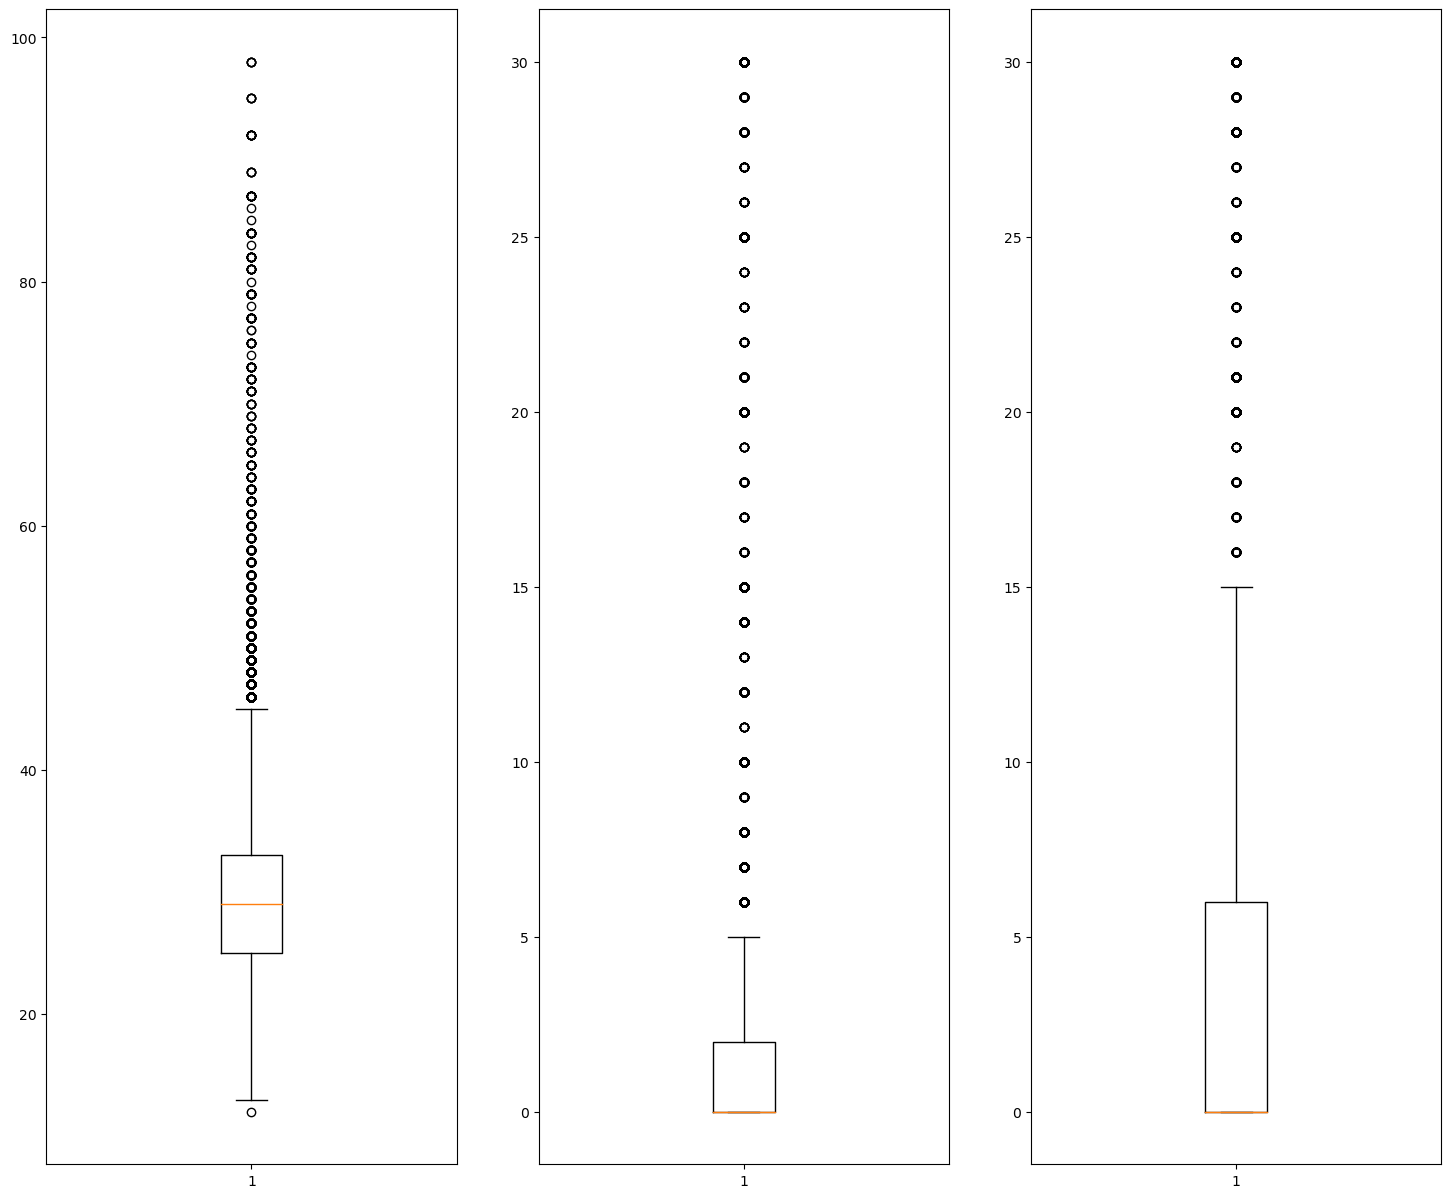

In [9]:
fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=(18,15))

ax1.boxplot(hdf['BMI'])
ax2.boxplot(hdf['MentHlth'])
ax3.boxplot(hdf['PhysHlth'])
plt.show()

In [10]:
data=hdf[(hdf.BMI<upper_range1)]

In [49]:
data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


### Model Developement

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

#### Diabetes Prediction

### DecisionTreeClassifier

In [51]:
x = data.drop(['Diabetes'],axis =1).values
y = data['Diabetes'].values

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [53]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=114,min_samples_split=114, min_samples_leaf=114)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)

model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print(model_dt_2_score_train)    
print(model_dt_2_score_test)

0.7487112692850985
0.7410478426768418


### Performance Metrices

In [54]:
y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print(roc_auc_dt)

0.8166659116039822


In [55]:
predictions = model_dt_2.predict(x_test)
predictions

array([1., 1., 0., ..., 0., 1., 1.])

In [56]:
y_actual_result = 0
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

In [57]:
#Recall
#y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.7180260452364633


In [58]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

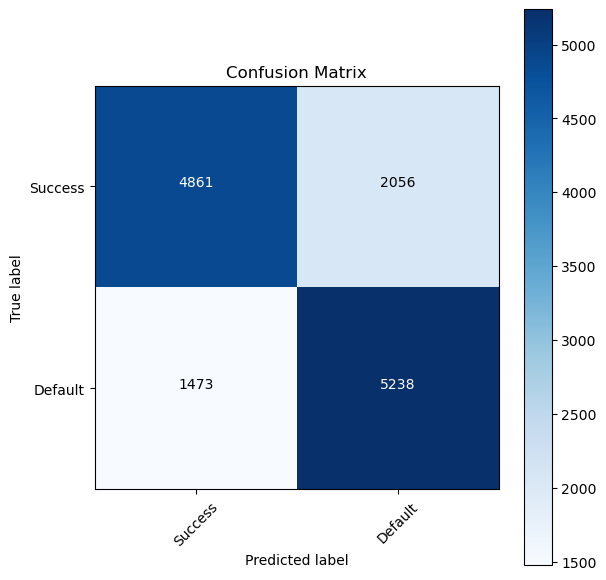

In [59]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

In [60]:
accuracy_score(y_test, predictions)

0.7410478426768418

### Random Forest Classfier

In [16]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC

In [28]:
data1=hdf[(hdf.BMI<upper_range1)]

In [30]:
x1 = data1.drop(['Diabetes','Stroke','HvyAlcoholConsump'],axis =1).values
y1 = data1['Diabetes'].values

In [65]:
training_set, test_set, class_set, test_class_set = train_test_split(x1,y1,test_size = 0.20)

In [67]:
fit_rf=RFC(random_state=23)

#### OOB score Calculation

In [ ]:
scores =[]
for k in range(150,300):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(training_set, class_set)
    y_pred = rfc.predict(test_set)
    scores.append(accuracy_score(test_class_set , y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')


In [82]:
scores.index(0.7290871734663927)

12

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:


hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10],
                         'bootstrap': [True, False],
                        'max_features': ['auto','sqrt']
                         }


rs = RandomizedSearchCV(fit_rf,param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

rs.fit(training_set, class_set)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)

Optimal hyperparameter combination: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

Mean cross-validated training accuracy score: 0.7460329456871349


In [83]:
# Set best parameters given by grid search 
fit_rf.set_params(bootstrap = True,
                  warm_start=False, 
                  oob_score=False,
                  min_samples_split=2,
                  min_samples_leaf = 1,
                  max_features = 'sqrt',
                  max_depth = 10,
                  n_estimators = 171)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=171,
                       random_state=23)

In [84]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=171,
                       random_state=23)

In [85]:
#Predictions
predictions_rf = fit_rf.predict(test_set)

In [86]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(test_class_set, predictions_rf))

<IPython.core.display.Javascript object>

ACCURACY OF THE MODEL:  0.7508805400645729


In [87]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

<IPython.core.display.Javascript object>

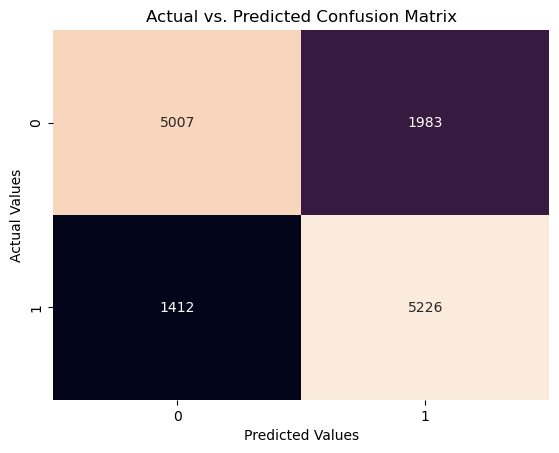

In [88]:
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [89]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.751


### Using SVM (It is not completed yet.. Soon I'll update)

In [34]:
#Scale the data to be between -1 and 1
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x1)
X = scaler.transform(x1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=1)

In [ ]:
from sklearn.svm import SVC
svm_model= SVC()

tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear','rbf','poly'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],    
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly','rbf','linear']
                   }

#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

print(model_svm.best_params_)

In [ ]:
svc=SVC(kernel='poly',C=18,gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.coolwarm
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm,
                    decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

In [ ]:
print(classification_report(y_pred, 
            y_test, 
            target_names = ['0','1']))